The aim of the project is to develop a predictive machine learning model that identifies the relationship between production units and sales revenue. This model will enable businesses to forecast sales based on production levels, optimize resource allocation, and maximize revenue generation.


## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load and prepare Data

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
# Check the shape of my data
df.shape

(700, 2)

In [4]:
# Check for missing data
df.isna().sum()

x    0
y    1
dtype: int64

In [5]:
# Fill in missing values
df["y"] = df["y"].fillna(df["y"].median())

In [6]:
df.isna().sum()

x    0
y    0
dtype: int64

In [7]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       700 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [8]:
# Check data description
df.describe()

,x,y
count,700.000000,700.000000
mean,54.985939,49.938488
std,134.681703,29.088411
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.973020
75%,75.000000,74.880631
max,3530.157369,108.871618


In [9]:
df.select_dtypes(include="float").columns

Index(['x', 'y'], dtype='object')

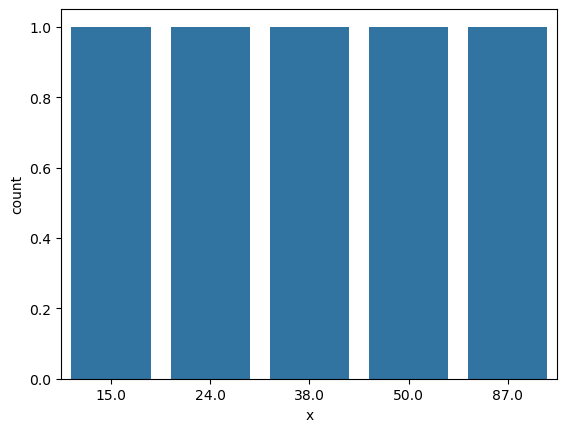

In [10]:
sns.countplot(x='x', data=df.head());

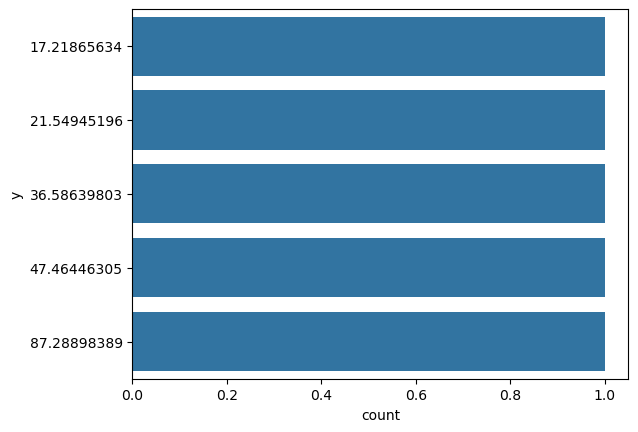

In [11]:
sns.countplot(y='y', data=df.head());

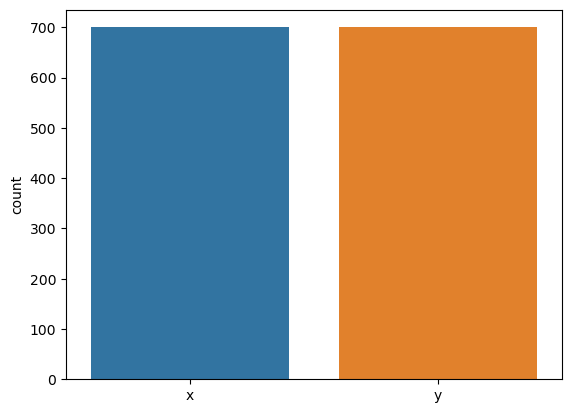

In [12]:
sns.countplot(df);

<Axes: ylabel='x'>

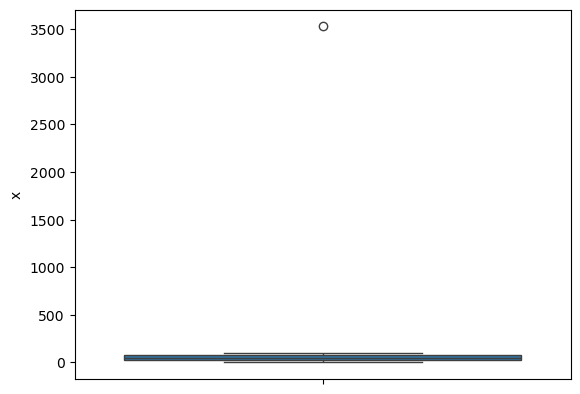

In [13]:
# Box Plot
import seaborn as sns
sns.boxplot(df["x"])

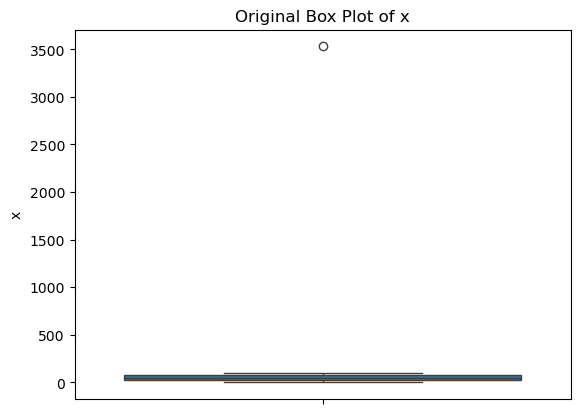

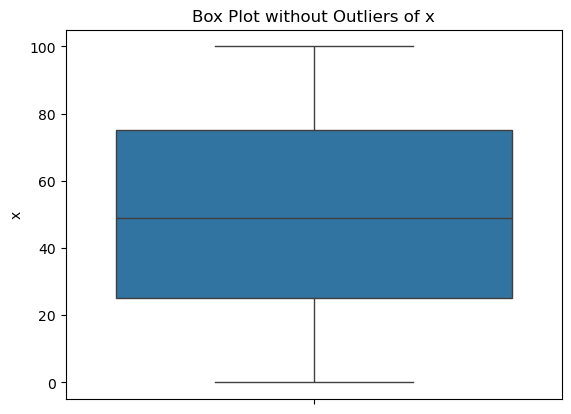

In [14]:
# removing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 100

no_outliers = removal_box_plot(df, 'x', threshold_value)

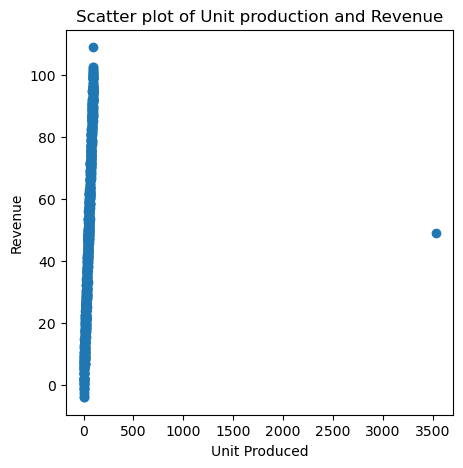

In [17]:
plt.figure(figsize=(5, 5))
plt.scatter(df["x"], df["y"])
plt.title("Scatter plot of Unit production and Revenue")
plt.xlabel("Unit Produced")
plt.ylabel("Revenue")
plt.show()

In [18]:
upper_limit = df["x"].quantile(0.95)
lower_limit = df["x"].quantile(0.05)
df["x"] = df["x"].clip(lower_limit, upper_limit)

In [19]:
df.describe()

,x,y
count,700.000000,700.000000
mean,50.125714,49.938488
std,28.651698,29.088411
min,5.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,48.973020
75%,75.000000,74.880631
max,97.000000,108.871618


In [21]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df['x']))
# print(z)

In [22]:
# threshold_z = 5

# outlier_indices = np.where(z > threshold_z)[0]
# x = df.drop(outlier_indices)
# print("Original DataFrame Shape:", df.shape)
# print("DataFrame Shape after Removing Outliers:", x.shape)

In [23]:
df = pd.get_dummies(data = df)
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [24]:
df.corr()

,x,y
x,1.000000,0.993032
y,0.993032,1.000000


In [25]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [26]:
# from sklearn.preprocessing import StandardScaler

In [27]:
# scaler = StandardScaler()
# features = df
# scaled_features = scaler.fit_transform(features.values)

In [28]:
# scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

# Convert continuous labels to discrete classes
# y = [int(label) for label in y]

In [29]:
# scaled_df.head(5)

In [30]:
# scaled_df.dtypes

## Split data into train and test set

In [31]:
X = df.drop(columns="y")
y = df["y"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=0)

len(X_train), len(X_test), len(y_train), len(y_test)

(560, 140, 560, 140)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 1), (140, 1), (560,), (140,))

## Model building

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, mean_squared_error, r2_score

reg = linear_model.Ridge(alpha=.5)

In [36]:
reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [37]:
reg.coef_

array([1.00613279])

In [38]:
reg.intercept_

-0.58006683701079

In [39]:
reg.score(X_test, y_test)

0.9905427677370531

## Evaluate model

In [40]:
y_preds = reg.predict(X_test)

In [41]:
msle = mean_squared_log_error(y_test,y_preds)
mae = mean_absolute_error(y_test,y_preds)
r2 = r2_score(y_test,y_preds)
mse = mean_squared_error(y_test,y_preds)

In [42]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.01
MAE: 2.33
MSE: 8.03
r2: 0.99


## Model building

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
linreg = LinearRegression()

In [45]:
linreg.fit(X_train, y_train)

LinearRegression()

In [46]:
linreg.score(X_test, y_test)

0.9905427893452833

In [47]:
y_pred = linreg.predict(X_test)

In [48]:
msle = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [49]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.01
MAE: 2.33
MSE: 8.03
r2: 0.99


### Hyperparameter tuning using RandomizedSearchCV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
parameters = {'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False] }

In [52]:
random_cv = RandomizedSearchCV(
                           estimator=linreg,
                           param_distributions=parameters,
                           n_iter=5, # Number of models to try
                           cv=5,
                           verbose=2, 
                           n_jobs=-1, 
)

In [53]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [1, 5, 10, 15, None],
                                        'positive': [True, False]},
                   verbose=2)

In [54]:
random_cv.best_estimator_

LinearRegression(copy_X=False, fit_intercept=False)

In [55]:
random_cv.best_params_

{'positive': False, 'n_jobs': None, 'fit_intercept': False, 'copy_X': False}

In [56]:
random_cv.best_score_

0.9843883996992545

### Hyperparameter tuning using GridSearchCV

In [57]:
# Using GridSearchCV with our regressor pipeline.
from sklearn.model_selection import GridSearchCV

pipe_grid = {
               'copy_X': [True,False], 
               'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 
               'positive': [True,False]
}

gs_model = GridSearchCV(linreg, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=5, positive=True; total 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [1, 5, 10, 15, None],
                         'positive': [True, False]},
             verbose=2)

In [58]:
gs_model.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}

In [59]:
gs_model.best_score_

0.9843887379479636

## Final Model (LinearRegression)

In [97]:
final_model = LinearRegression(copy_X = True,
                               fit_intercept = True,
                               n_jobs = 1,
                               positive = True)

In [98]:
final_model.fit(X_train, y_train)

LinearRegression(n_jobs=1, positive=True)

In [99]:
y_pred = final_model.predict(X_test)
y_pred

array([50.44721919, 49.25893836, 50.78142317, 49.9644801 , 49.6674099 ,
       48.7390655 , 51.30129603, 48.5905304 , 49.59314235, 49.37033969,
       48.21919264, 50.59575429, 50.7442894 , 48.14492509, 48.5905304 ,
       49.9644801 , 49.815945  , 50.29868409, 49.92734633, 49.92734633,
       48.7390655 , 48.18205887, 51.22702848, 49.03613571, 48.07065754,
       48.92473438, 49.70454367, 47.84785488, 48.07065754, 49.5188748 ,
       47.95925621, 50.07588143, 48.36772774, 49.18467081, 49.815945  ,
       47.92212243, 49.44460724, 50.26155031, 51.33842981, 49.55600857,
       49.59314235, 48.40486152, 48.66479795, 48.03352376, 50.37295164,
       48.62766418, 48.36772774, 47.95925621, 48.47912907, 48.5905304 ,
       51.11562716, 49.815945  , 48.51626285, 50.37295164, 49.44460724,
       48.85046683, 51.30129603, 48.62766418, 48.5905304 , 49.48174102,
       49.03613571, 49.74167745, 48.03352376, 51.00422583, 50.81855695,
       49.14753704, 48.77619928, 50.8928245 , 48.62766418, 47.95

In [100]:
msle = mean_squared_log_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [101]:
print(f"MSLE: {msle:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"r2: {r2:.2f}")

MSLE: 0.62
MAE: 24.48
MSE: 789.95
r2: 0.07


In [102]:
from sklearn.inspection import permutation_importance
result = permutation_importance(final_model, X, y, n_repeats=10,
                                random_state=0)

In [103]:
result

{'importances_mean': array([0.06886661]),
 'importances_std': array([0.01275121]),
 'importances': array([[0.04814673, 0.07124843, 0.07516263, 0.08011962, 0.05235956,
         0.08991659, 0.06597426, 0.07718584, 0.05454548, 0.07400691]])}

In [104]:
df_preds = pd.DataFrame()
df_preds["ActualRevenue"] = df["y"][:140]
df_preds["PredectedRevenue"] = y_preds
df_preds

,ActualRevenue,PredectedRevenue
0,21.549452,50.447219
1,47.464463,49.258938
2,17.218656,50.781423
3,36.586398,49.964480
4,87.288984,49.667410
...,...,...
135,92.157498,49.853079
136,81.222592,50.261550
137,25.101141,51.264162
138,94.088534,51.301296
